In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# k means algorithm requires scaling, but not here !!!

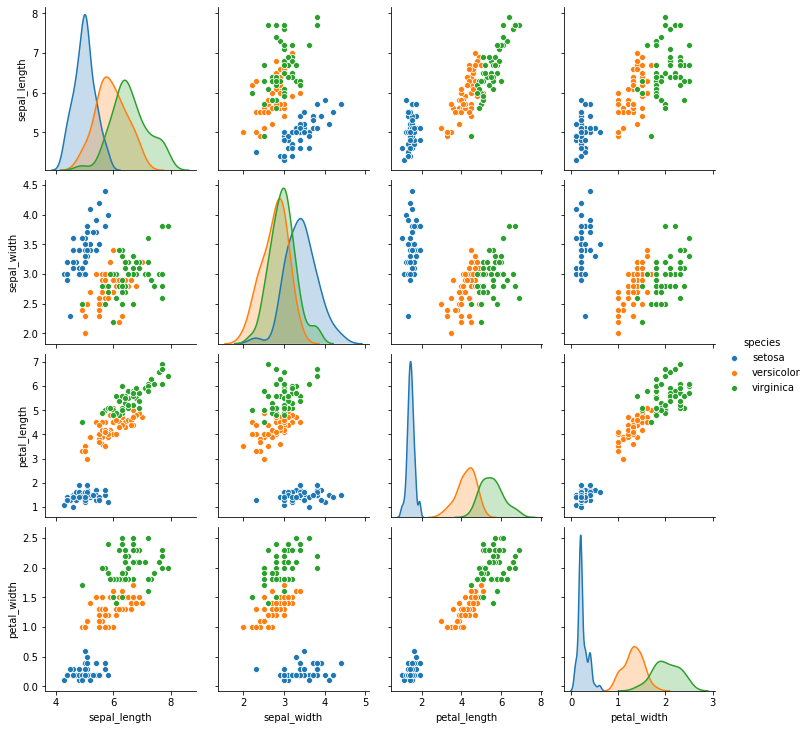

In [9]:
sns.pairplot(df, hue="species")

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


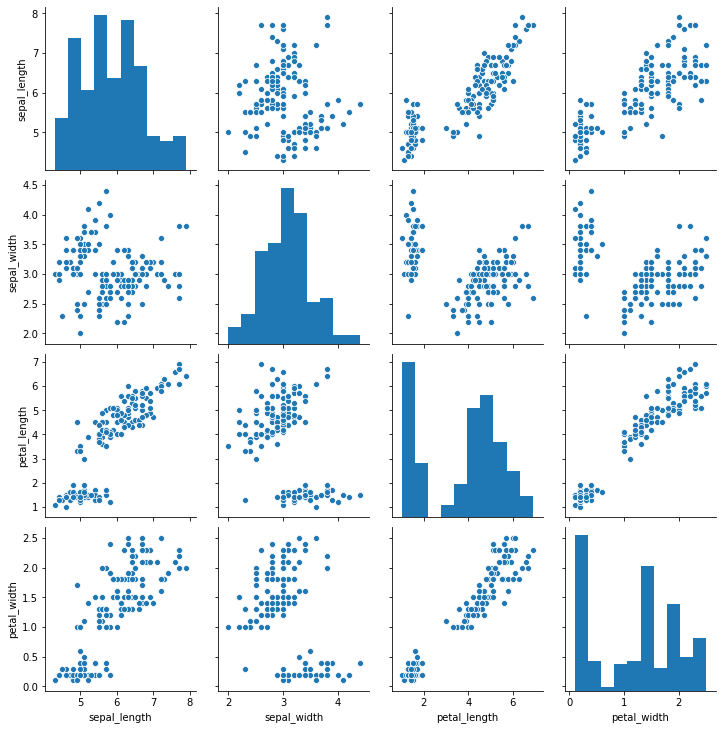

In [13]:
sns.pairplot(X)

## Hopkins Test

In [15]:
from pyclustertend import hopkins

In [17]:
hopkins(X, X.shape[0])

0.1628734149299944

## Elbow Method

681.3706
152.34795176035792
78.85144142614601
57.228473214285714
46.472230158730156
41.7120101010101
34.35601673815633
29.990426406926414
27.96334212672657


Text(0, 0.5, 'error')

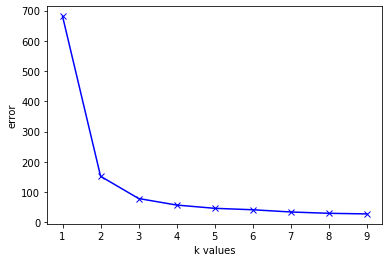

In [27]:
ssd = []

K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)
    print(model.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("k values")
plt.ylabel("error")

In [39]:
model = KMeans(n_clusters=3)

In [40]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
model.inertia_

78.85144142614601

In [42]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [43]:
clusters = model.labels_

In [44]:
adjusted_rand_score(y, clusters)

0.7302382722834697

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [46]:
df["clusters"] = clusters

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [48]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
128,6.4,2.8,5.6,2.1,virginica,0
111,6.4,2.7,5.3,1.9,virginica,0
47,4.6,3.2,1.4,0.2,setosa,1
149,5.9,3.0,5.1,1.8,virginica,2
70,5.9,3.2,4.8,1.8,versicolor,2
77,6.7,3.0,5.0,1.7,versicolor,0
78,6.0,2.9,4.5,1.5,versicolor,2
120,6.9,3.2,5.7,2.3,virginica,0
91,6.1,3.0,4.6,1.4,versicolor,2
39,5.1,3.4,1.5,0.2,setosa,1


In [53]:
ct = pd.crosstab(df.clusters, df.species)
ct

species,setosa,versicolor,virginica
clusters,,,
0,0,2,36
1,50,0,0
2,0,48,14


In [62]:
centers = model.cluster_centers_

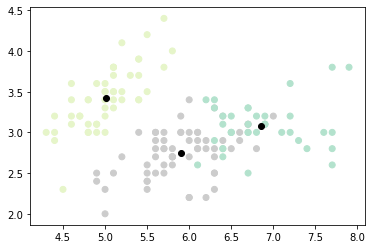

In [66]:
plt.scatter(df.sepal_length, df.sepal_width, c=df.clusters, cmap="Pastel2")
plt.scatter(centers[:,0], centers[:,1], c="black")